# Joint Densities

- This section presents the natural extension from the probabilistic behavior of a single random variable to the analysis of two or more.


- A relevant concept is that the knowledge of only $f_{X}(x)$ and $f_{Y}(y)$ is not enough to characterize the simultaneous behavior of $X$ and $Y$.

In this lab we will focus on how to analyze multiple random variables. The definitions will be used in the context of a simulation exercise. This is similar to the type of analysis that can be performed with real data.

## Simulation Exercise:

Based on the bivariate normal distribution:

**Definition 1:** Two random variables defined on the same set of real numbers are jointly continuous if there exists a function $f{X,Y}(x, y)$ such that for any region R in the xy-plane $P[(X, Y) \in R]=\iint_{R} f_{X, Y}(x, y) d x d y$. The function $f_{X,Y}(x, y)$ is the joint pdf of $X$ and $Y$.


$$f(x, y)=\frac{1}{2 \pi \sigma_{X} \sigma_{Y} \sqrt{1-\rho^{2}}} \exp \left(-\frac{1}{2\left(1-\rho^{2}\right)}\left[\frac{\left(x-\mu_{X}\right)^{2}}{\sigma_{X}^{2}}+\frac{\left(y-\mu_{Y}\right)^{2}}{\sigma_{Y}^{2}}-\frac{2 \rho\left(x-\mu_{X}\right)\left(y-\mu_{Y}\right)}{\sigma_{X} \sigma_{Y}}\right]\right)$$

$$\boldsymbol{\mu}=\left(\begin{array}{c}
\mu_{X} \\
\mu_{Y}
\end{array}\right), \quad \boldsymbol{\Sigma}=\left(\begin{array}{cc}
\sigma_{X}^{2} & \rho \sigma_{X} \sigma_{Y} \\
\rho \sigma_{X} \sigma_{Y} & \sigma_{Y}^{2}
\end{array}\right)$$

1. Simulate a **random sample** of size $n$

In [53]:
mu <- c(0,0)
sigma <- matrix(c(1,0.9,0.9,1),2,2)
n <- 1000

In [56]:
print(mu)
print(sigma)

[1] 0 0
     [,1] [,2]
[1,]   10    3
[2,]    3    2


In [70]:
set.seed(42)
x <- mvrnorm(n = n, mu, sigma)
df <- data.frame(x)
colnames(df) <- c("x", "y")

In [71]:
head(df)

x,y
-3.5783720,-3.64361751
1.9425233,0.09503448
-0.8355840,-1.30177087
-1.8720462,-1.02138027
-1.5869424,0.52082518
0.1449723,0.67812639


**Theorem 3.7.2** Suppose $X$ and $Y$ are jointly continuous with joint pdf $f_{X,Y}(x, y)$. Then the marginal
pdfs, $f_{X}(x)$ and $f_{Y}(y)$, are given by

$$f_{X}(x)=\int_{-\infty}^{\infty} f_{X, Y}(x, y) d y \quad \text { and } \quad f_{Y}(y)=\int_{-\infty}^{\infty} f_{X, Y}(x, y) d x$$

In the case of the normal distribution, it can be shown that if $X$ and $Y$ distribute jointly normal:

$$N\left(\left(\begin{array}{c}\mu_{X} \\ \mu_{Y} \end{array}\right), \left(\begin{array}{cc} \sigma_{X}^{2} & \rho \sigma_{X} \sigma_{Y} \\ \rho \sigma_{X} \sigma_{Y} & \sigma_{Y}^{2}\end{array}\right)\right)$$. 

Then, the marginal of $X$, $f_{X}(x)$, is given by $N(\mu_{x},\sigma_{x}^{2})$ while the marginal of $y$, $f_{X}(x)$, is $N(\mu_{y},\sigma_{y}^{2}$).

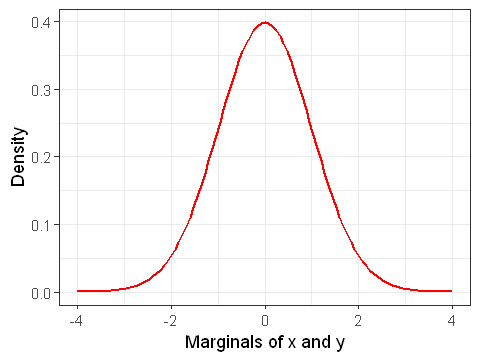

In [84]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data.frame(x = c(-4, 4)), aes(x = x)) + 
stat_function(fun = dnorm, args = list(0, 1),colour = "red",size = 0.7) +
scale_x_continuous(name = "Marginals of x and y") + 
scale_y_continuous(name = "Density") + theme_bw()

In [34]:
suppressWarnings(library(MASS))

In [ ]:
suppressWarnings(library(RColorBrewer))

The function ```brewer.pal()```  returns the color code information for different pallets of colors. For this example we are using the pallet ```Spectral```

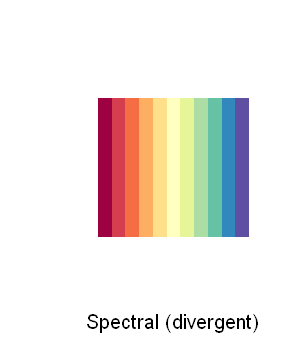

In [111]:
options(repr.plot.width=2.5, repr.plot.height=3)
display.brewer.pal(11,"Spectral")

In [115]:
length(rev(brewer.pal(11,'Spectral')))

[1] 11

The function ```colorRampPalette``` create intermediate colors between the existing pallet and return their color code. In this case the total number of colors is 32.

In [121]:
rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
r <- rf(32)

[1] 32

In [ ]:
# Create histograms 

h1 <- hist(df$x, breaks=25, plot=FALSE)
h2 <- hist(df$y, breaks=25, plot=FALSE)
top <- max(h1$counts, h2$counts)

In [91]:
# Devide the conitnous space between -4  and 4 into dicrete sections and assign frequencies to each

k <- kde2d(df$x, df$y, n=25)

The ```par()``` function is used to define the parameters to put multiple graphs in the same plot. There is a long list of parameters which you can access through ```?par```. In this case we are using the parameter ```mar``` which is a numeric vector of length 4, which sets the margin sizes in the following order: bottom, left, top, and right. 

The ```layout()``` function can also be used to combine  multiple graphs in the same plot. In this case we are dividing the plot into 4.

In [133]:
matrix(c(2,0,1,3),2,2,byrow=T)

2,0
1,3


In this case in the first position we will plot Graph 1, in the second position nothing, in the third position graph 1, and in the four position plot 3.

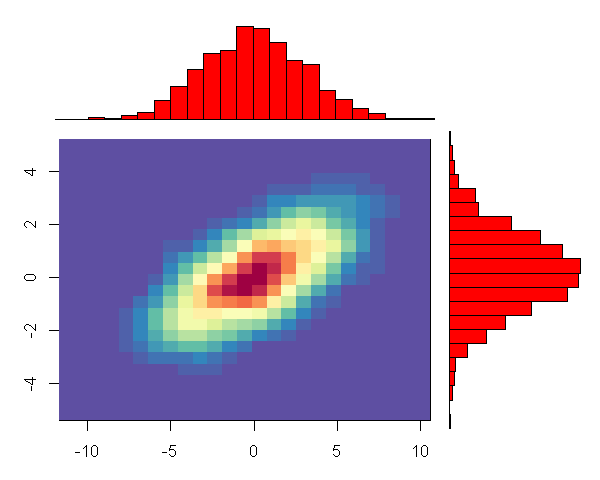

In [143]:
# Define the layout
layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))

options(repr.plot.width=5, repr.plot.height=4)

# Graph #1: Create the 2d histogram, comparison color rev(brewer.pal(11,'Spectral'))
par(mar=c(3,3,1,1))
image(k, col=r) #plot the image

# Graph #2: first histogram
par(mar=c(0,2,1,0))
barplot(h1$counts, axes=FALSE, ylim=c(0, top), space=0, col='red')

# Graph #3: second histogram
par(mar=c(2,0,0,1))
barplot(h2$counts, axes=FALSE, xlim=c(0, top), space=0, col='red', horiz=T)

What if the two random variables are **independent**?

**Theorem 3.7.4** The continuous random variables $X$ and $Y$ are independent if and only if there are functions $g(x)$ and $h(y)$ such that

$$f_{X, Y}(x, y)=g(x) h(y)$$

For the case of the normal distribution (<span style="color:red">only for the normal</span>), it can be shown that no correlation ($\rho = 0$) implies independence. 

In [144]:
sigma_i <- matrix(c(1,0,0,1),2,2)

In [147]:
set.seed(42)
x_ind <- mvrnorm(n = n, mu, sigma_i)
df_ind <- data.frame(x_ind)
colnames(df_ind) <- c("x_ind", "y_ind")

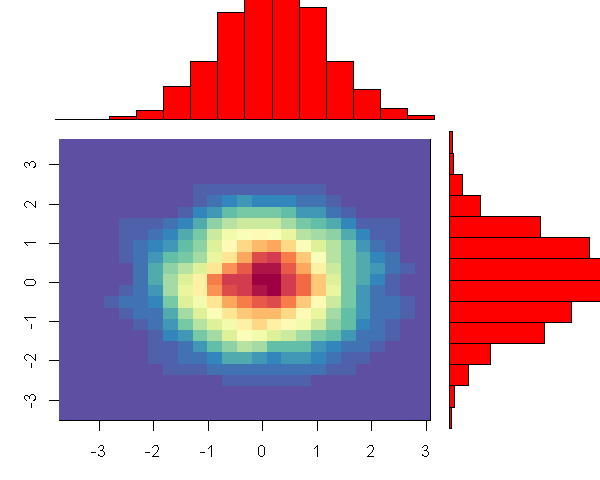

In [152]:
# Create histograms 

h1i <- hist(df_ind$x_ind, breaks=22, plot=FALSE)
h2i <- hist(df_ind$y_ind, breaks=22, plot=FALSE)
topi <- max(h1i$counts, h2i$counts)
ki <- kde2d(df_ind$x_ind, df_ind$y_ind, n=25)

layout(matrix(c(2,0,1,3),2,2,byrow=T),c(3,1), c(1,3))
options(repr.plot.width=5, repr.plot.height=4)

par(mar=c(3,3,1,1))
image(ki, col=r) 

par(mar=c(0,2,1,0))
barplot(h1i$counts, axes=FALSE, ylim=c(0, top), space=0, col='red')

par(mar=c(2,0,0,1))
barplot(h2i$counts, axes=FALSE, xlim=c(0, top), space=0, col='red', horiz=T)